<a href="https://colab.research.google.com/github/Kuber757/google_landmark_recognition/blob/main/EfficientNetB2_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.27.223.146:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.27.223.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.27.223.146:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_size = (180, 180)
batch_size = 32
# /content/drive/My Drive/data_trial_core
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/core_project_data",
    validation_split=0.01,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/core_project_data",
    validation_split=0.3,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 5122 files belonging to 51 classes.
Using 5071 files for training.
Found 5122 files belonging to 51 classes.
Using 1536 files for validation.


In [ ]:
data_augmentation = keras.Sequential(
      [
          layers.experimental.preprocessing.RandomFlip("horizontal"),
          layers.experimental.preprocessing.RandomRotation(0.1),
          layers.experimental.preprocessing.RandomContrast(0.3),
      ]
)

In [5]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)

In [6]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [7]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling1D, Dense
tf.__version__

'2.3.0'

In [8]:
pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-4ib0puiy
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-4ib0puiy
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 51kB 3.8MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33791 sha256=f6b987b7a19e4cc289d1774a13bee1fe22192f6fc9e09aa22548668430fa8a2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ydt9nvz/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [9]:
# with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
inp = tf.keras.layers.Input(shape = (*image_size, 3), name = 'inp1')
inp = data_augmentation(inp)
label = tf.keras.layers.Input(shape = (), name = 'inp2')

In [10]:
import efficientnet.tfkeras as efn

In [11]:
# with tpu_strategy.scope():
#   x = efn. EfficientNetB7(weights=None, 
#                           include_top=False,
#                           input_shape = (180, 180, 3))
#   x.trainable = True

#     # Add Layer Embedding
#   model = tf.keras.Sequential([
#         x,
#         GlobalAveragePooling2D(),
#         Dense(50, activation = "softmax")
#   ])

#   model.summary()

In [12]:
input = tf.keras.layers.Input(shape = (180,180,3))
    
    # Create and Compile Model and show Summary
effnet_model = efn.EfficientNetB2(weights = "imagenet", include_top = False, input_tensor = input, pooling = 'avg', classes = None)
    
X = tf.keras.layers.Dropout(0.25)(effnet_model.output)
X = tf.keras.layers.Dense(1024, activation = 'relu')(X)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dropout(0.25)(X)
preds = tf.keras.layers.Dense(50, activation = 'softmax')(X)
    
    # Create Final Model
model = tf.keras.Model(inputs = effnet_model.input, outputs = preds)

    # UnFreeze all layers
for layer in model.layers:
  layer.trainable = True
model.summary()

31940608/31936256 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 90, 90, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 90, 90, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 90, 90, 32)   0           stem_bn[0][0]                    
______________________

In [13]:
epochs = 20

callbacks = [
     keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = [tf.keras.losses.SparseCategoricalCrossentropy()],
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)
final_accuracy = history.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

Epoch 1/20
159/159 [==============================] - 1705s 11s/step - loss: 1.5903 - accuracy: 0.6214 - val_loss: 0.6486 - val_accuracy: 0.8288
Epoch 2/20
159/159 [==============================] - 46s 288ms/step - loss: 0.4498 - accuracy: 0.8687 - val_loss: 0.1116 - val_accuracy: 0.9674
Epoch 3/20
159/159 [==============================] - 46s 287ms/step - loss: 0.3102 - accuracy: 0.9089 - val_loss: 0.1603 - val_accuracy: 0.9674
Epoch 4/20
159/159 [==============================] - 47s 294ms/step - loss: 0.2568 - accuracy: 0.9251 - val_loss: 0.1788 - val_accuracy: 0.9564
Epoch 5/20
159/159 [==============================] - 45s 281ms/step - loss: 0.2249 - accuracy: 0.9353 - val_loss: 0.0974 - val_accuracy: 0.9733
Epoch 6/20
159/159 [==============================] - 44s 280ms/step - loss: 0.1700 - accuracy: 0.9501 - val_loss: 0.0891 - val_accuracy: 0.9746
Epoch 7/20
159/159 [==============================] - 45s 284ms/step - loss: 0.1367 - accuracy: 0.9598 - val_loss: 0.0512 - val_ac

NameError: ignored

In [14]:
import numpy as np
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5:  0.98046875


In [16]:
from matplotlib import pyplot as plt

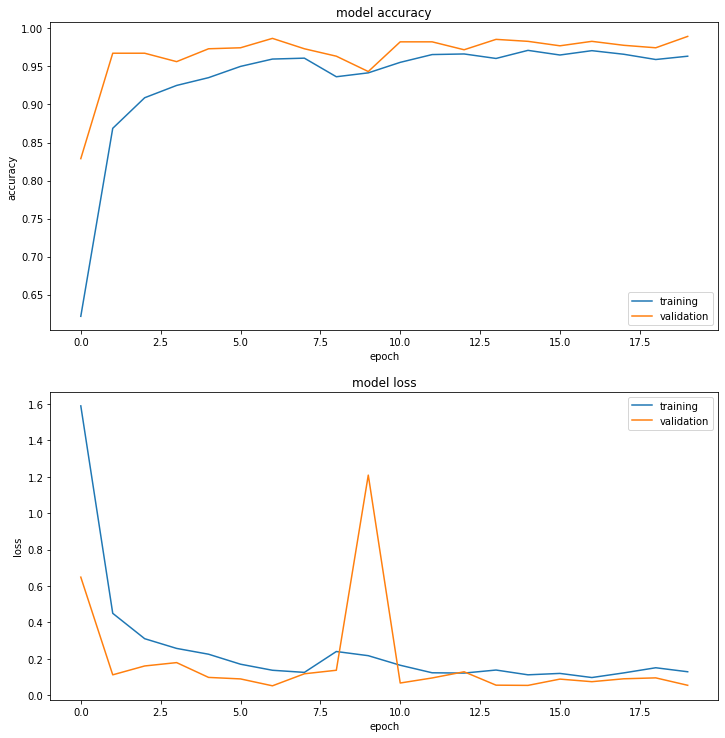

In [17]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [20]:
reloaded_model = tf.keras.models.load_model('save_at_20.h5')

In [22]:
score = model.evaluate(val_ds, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.0540609173476696 / Test accuracy: 0.9895833134651184


In [23]:
samples_to_predict = np.array("/content/drive/My Drive/core_project_data/145/06d3a8d8d1c97d39")
print(samples_to_predict.shape)
# predictions = model.predict(samples_to_predict)
# print(predictions)
# yout = reloaded_model.predict()

()


In [ ]:
reshaped_image = input_train[sample].reshape((img_width, img_height))
plt.imshow(reshaped_image)